In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from astropy.io import fits
from astropy.table import Table
# from astropy import units as u
# from astropy.coordinates import SkyCoord
# from astropy.visualization import astropy_mpl_style
from pathlib import Path
from tqdm import tqdm

# print([model[15:] for model in os.listdir("Elasticc")][:-1])
# fit_file = "07"
# head = fits.open(f"Elasticc/ELASTICC_TRAIN_uLens-Single-GenLens/ELASTICC_TRAIN_NONIaMODEL0-00{fit_file}_HEAD.FITS.gz")[1].data
# phot = fits.open(f"Elasticc/ELASTICC_TRAIN_uLens-Single-GenLens/ELASTICC_TRAIN_NONIaMODEL0-00{fit_file}_PHOT.FITS.gz")[1].data
# Table(head[:5])
# Table(phot[:5])


In [ ]:
elastic = pd.read_csv("elasticc_data.txt")

### Balance of the Elasticc data set (.fit)

In [25]:
%%time
# models = {model: aumount_of_light_curves}
data_set = "Elasticc"
lc_models = [folder for folder in os.listdir("Elasticc") if "ELASTICC_TRAIN" in folder]
models = {}
for model in lc_models:
    heads = [f for f in os.listdir(f"Elasticc/{model}") if f[-12:] == "HEAD.FITS.gz"]
    for fit in heads:
        h = fits.open(f"Elasticc/{model}/{fit}")[1].data
    models[model[15:]] = len(h)

CPU times: user 2min 7s, sys: 1.39 s, total: 2min 8s
Wall time: 2min 30s


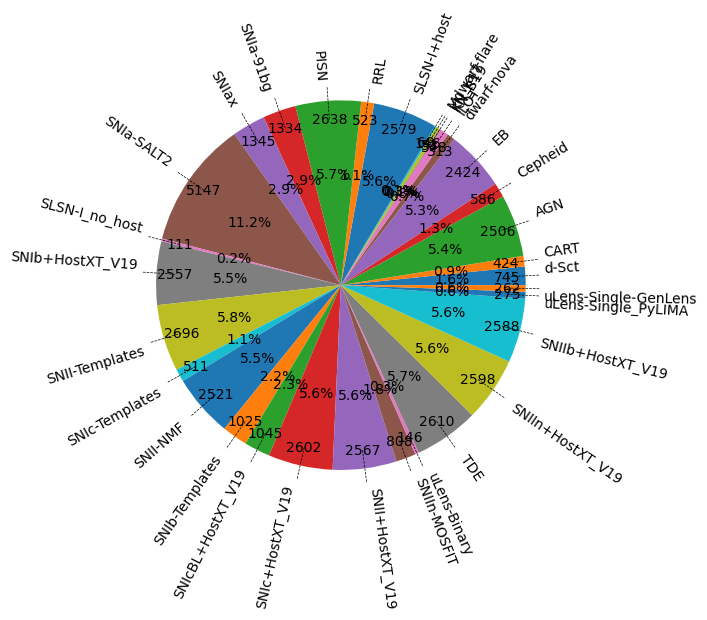

In [107]:
labels=list(models.keys())
values = list(models.values())
plt.figure(figsize=(6, 6)) 
wedges, label, j = plt.pie(models.values(), labels=models.keys(), autopct='%1.1f%%', rotatelabels=True)
for i, (wedge, label) in enumerate(zip(wedges, labels)):
    theta = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = 0.9 * np.cos(theta * np.pi / 180)
    y = 0.9 * np.sin(theta * np.pi / 180)
    plt.text(x, y, f'{values[i]}', ha='center', va='center')
    plt.plot([x, 1.2 * x], [y, 1.2 * y], color='black', linestyle='--', linewidth=0.5)

### Balance of a MicroLIA data set (.dat)

In [22]:
%%time
data_set = "2305222212g"
data_path_test = f"{data_set}/test_set-{data_set[:-1]}"
data_path_train = f"{data_set}/training_set-{data_set[:-1]}"
lc_models = [folder for folder in os.listdir(data_path_test) if "ELASTICC_TRAIN" in folder]
models = {}
for model in lc_models:
    test = [f for f in os.listdir(f"{data_path_test}/{model}") if f[-4:] == ".dat"]
    train = [f for f in os.listdir(f"{data_path_train}/{model}") if f[-4:] == ".dat"]
    models[model[15:]] = len(test)+len(train)

CPU times: user 8.44 ms, sys: 24.6 ms, total: 33.1 ms
Wall time: 221 ms


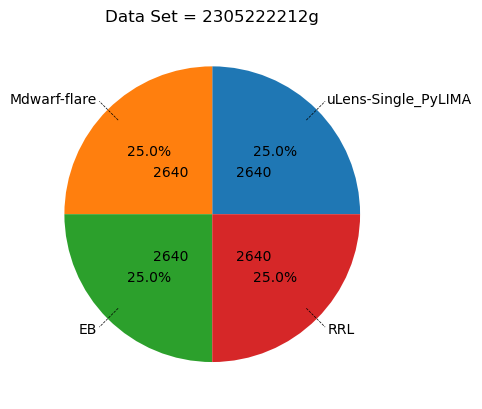

In [24]:
labels=list(models.keys())
values = list(models.values())
# plt.figure(figsize=(6, 6)) 
plt.title(f"Data Set = {data_set}")
wedges, label, j = plt.pie(models.values(), labels=models.keys(), radius = 1, autopct='%1.1f%%', rotatelabels=False)
for i, (wedge, label) in enumerate(zip(wedges, labels)):
    theta = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    x = np.cos(theta * np.pi / 180)
    y = np.sin(theta * np.pi / 180)
    plt.text(0.4*x, 0.4*y, f'{values[i]}', ha='center', va='center')
    plt.plot([0.9*x, 1.2*0.9 * x], [0.9*y, 1.2 *0.9* y], color='black', linestyle='--', linewidth=0.5)

### Sky view of light curves location: one fit of a model
Elasticc / *Models* (32 folders)/ *.fit* (40 files) → n curves 

Text(0, 0.5, 'Declination [degrees]')

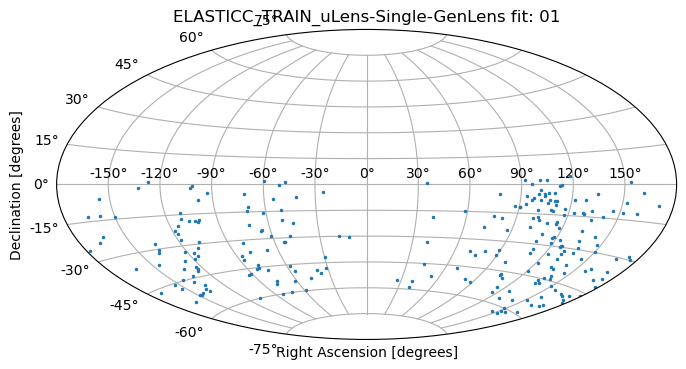

In [27]:
data_set = "Elasticc"                         # data set folder
model = "ELASTICC_TRAIN_uLens-Single-GenLens" # model folder
fit_file = "01"                               # fit file
lc = 8                                        # light curve

head = fits.open(f"Elasticc/{model}/ELASTICC_TRAIN_NONIaMODEL0-00{fit_file}_HEAD.FITS.gz")[1].data
phot = fits.open(f"Elasticc/{model}/ELASTICC_TRAIN_NONIaMODEL0-00{fit_file}_PHOT.FITS.gz")[1].data

# plt.style.use(astropy_mpl_style)  # default Astropy style
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='aitoff')  # Aitoff projection example
ax.grid(True) 

ra = head["RA"]  # Right Ascension in degrees
dec = head["DEC"]  # Declination in degrees
sky_coords = SkyCoord(ra=ra * u.deg, dec=dec * u.deg, frame='icrs')
ax.plot(sky_coords.ra.wrap_at(180 * u.deg).radian, sky_coords.dec.radian, 'o', markersize=1.5, label=model)

ax.set_title(model+f" fit: {fit_file}")
ax.set_xlabel('Right Ascension [degrees]')
ax.set_ylabel('Declination [degrees]')

### Sky view of light curves location: all curves of a model
Elasticc / *Models* (32 folders)/ *.fit* (40 files) → n curves 

['d-Sct', 'CART', 'AGN', 'Cepheid', 'EB', 'dwarf-nova', 'ILOT', 'KN_B19', 'KN_K17', 'Mdwarf-flare', 'SLSN-I+host', 'RRL', 'PISN', 'SNIa-91bg', 'SNIax', 'SNIa-SALT2', 'SLSN-I_no_host', 'SNIb+HostXT_V19', 'SNII-Templates', 'SNIc-Templates', 'SNII-NMF', 'SNIb-Templates', 'SNIcBL+HostXT_V19', 'SNIc+HostXT_V19', 'SNII+HostXT_V19', 'SNIIn-MOSFIT', 'uLens-Binary', 'TDE', 'SNIIn+HostXT_V19', 'SNIIb+HostXT_V19', 'uLens-Single_PyLIMA', 'uLens-Single-GenLens', 'nts']

  0%|          | 0/33 [00:00<?, ?it/s]

ELASTICC_TRAIN_d-Sct


  3%|▎         | 1/33 [00:03<01:58,  3.71s/it]

ELASTICC_TRAIN_CART


  6%|▌         | 2/33 [00:08<02:11,  4.23s/it]

ELASTICC_TRAIN_AGN


  9%|▉         | 3/33 [00:14<02:39,  5.33s/it]

ELASTICC_TRAIN_Cepheid


 12%|█▏        | 4/33 [00:18<02:16,  4.72s/it]

ELASTICC_TRAIN_EB


 15%|█▌        | 5/33 [00:24<02:19,  4.97s/it]

ELASTICC_TRAIN_dwarf-nova


 18%|█▊        | 6/33 [00:27<02:01,  4.51s/it]

ELASTICC_TRAIN_ILOT


 21%|██        | 7/33 [00:32<01:56,  4.48s/it]

ELASTICC_TRAIN_KN_B19


 24%|██▍       | 8/33 [00:36<01:50,  4.42s/it]

ELASTICC_TRAIN_KN_K17


 27%|██▋       | 9/33 [00:40<01:43,  4.29s/it]

ELASTICC_TRAIN_Mdwarf-flare


 30%|███       | 10/33 [00:44<01:35,  4.14s/it]

ELASTICC_TRAIN_SLSN-I+host


 33%|███▎      | 11/33 [00:50<01:47,  4.90s/it]

ELASTICC_TRAIN_RRL


 36%|███▋      | 12/33 [00:54<01:35,  4.54s/it]

ELASTICC_TRAIN_PISN


 39%|███▉      | 13/33 [01:01<01:45,  5.26s/it]

ELASTICC_TRAIN_SNIa-91bg


 42%|████▏     | 14/33 [01:06<01:39,  5.25s/it]

ELASTICC_TRAIN_SNIax


 45%|████▌     | 15/33 [01:12<01:36,  5.37s/it]

ELASTICC_TRAIN_SNIa-SALT2


 48%|████▊     | 16/33 [01:22<01:54,  6.75s/it]

ELASTICC_TRAIN_SLSN-I_no_host


 52%|█████▏    | 17/33 [01:25<01:31,  5.74s/it]

ELASTICC_TRAIN_SNIb+HostXT_V19


 55%|█████▍    | 18/33 [01:32<01:31,  6.10s/it]

ELASTICC_TRAIN_SNII-Templates


 58%|█████▊    | 19/33 [01:39<01:27,  6.22s/it]

ELASTICC_TRAIN_SNIc-Templates


 61%|██████    | 20/33 [01:43<01:14,  5.75s/it]/tmp/ipykernel_25529/4251929981.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8, 6))


ELASTICC_TRAIN_SNII-NMF


 64%|██████▎   | 21/33 [01:50<01:12,  6.06s/it]

ELASTICC_TRAIN_SNIb-Templates


 67%|██████▋   | 22/33 [01:55<01:02,  5.68s/it]

ELASTICC_TRAIN_SNIcBL+HostXT_V19


 70%|██████▉   | 23/33 [02:00<00:55,  5.54s/it]

ELASTICC_TRAIN_SNIc+HostXT_V19


 73%|███████▎  | 24/33 [02:07<00:52,  5.81s/it]

ELASTICC_TRAIN_SNII+HostXT_V19


 76%|███████▌  | 25/33 [02:14<00:49,  6.16s/it]

ELASTICC_TRAIN_SNIIn-MOSFIT


 79%|███████▉  | 26/33 [02:19<00:40,  5.81s/it]

ELASTICC_TRAIN_uLens-Binary


 82%|████████▏ | 27/33 [02:22<00:30,  5.11s/it]

ELASTICC_TRAIN_TDE


 85%|████████▍ | 28/33 [02:29<00:28,  5.61s/it]

ELASTICC_TRAIN_SNIIn+HostXT_V19


 88%|████████▊ | 29/33 [02:35<00:23,  5.91s/it]

ELASTICC_TRAIN_SNIIb+HostXT_V19


 91%|█████████ | 30/33 [02:42<00:18,  6.23s/it]

ELASTICC_TRAIN_uLens-Single_PyLIMA


 94%|█████████▍| 31/33 [02:46<00:10,  5.45s/it]

ELASTICC_TRAIN_uLens-Single-GenLens


 97%|█████████▋| 32/33 [02:50<00:05,  5.33s/it]

ELASTICC_TRAIN_nts


FileNotFoundError: [Errno 2] No such file or directory: 'Elasticc/ELASTICC_TRAIN_nts'

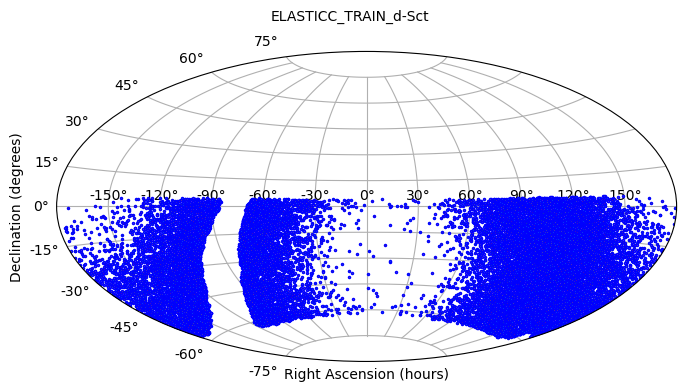

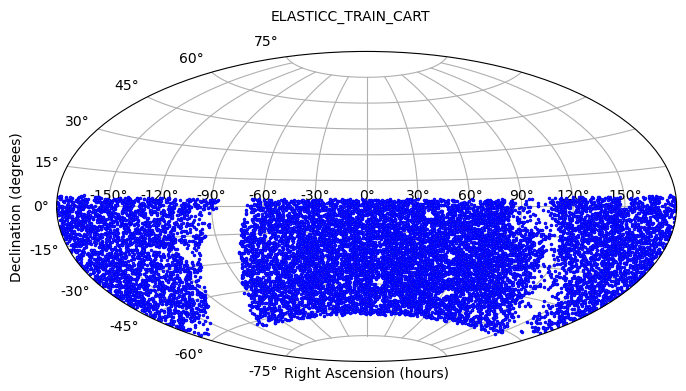

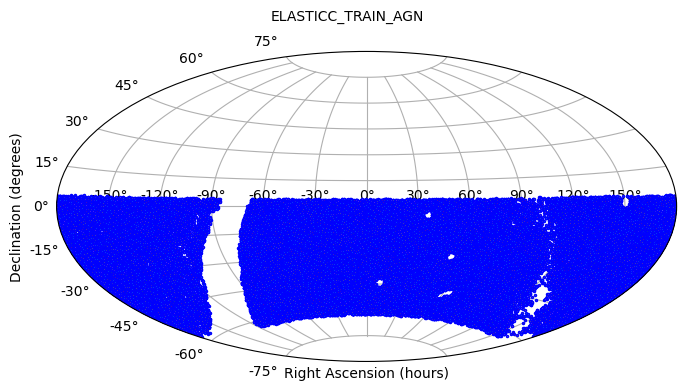

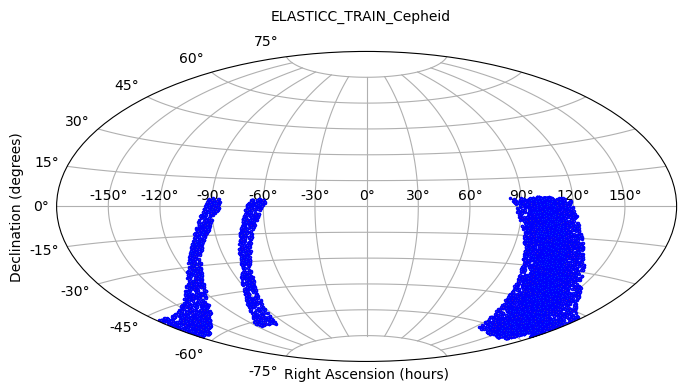

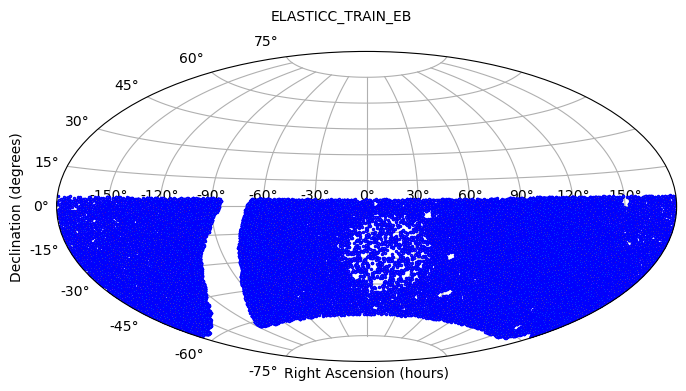

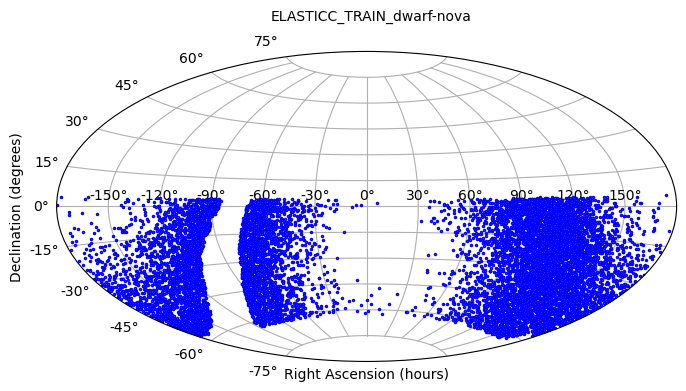

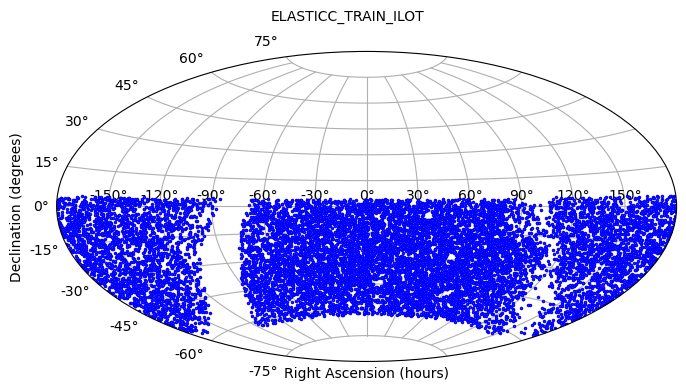

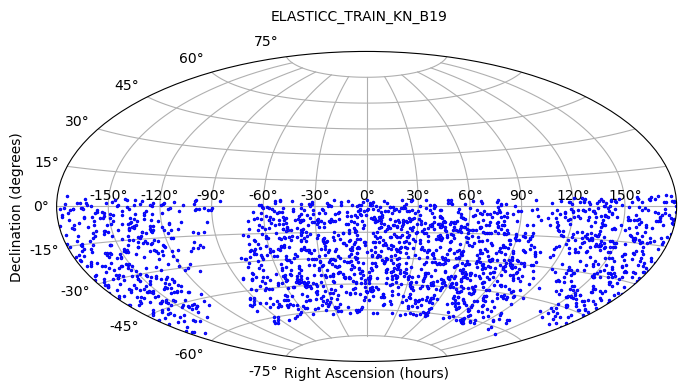

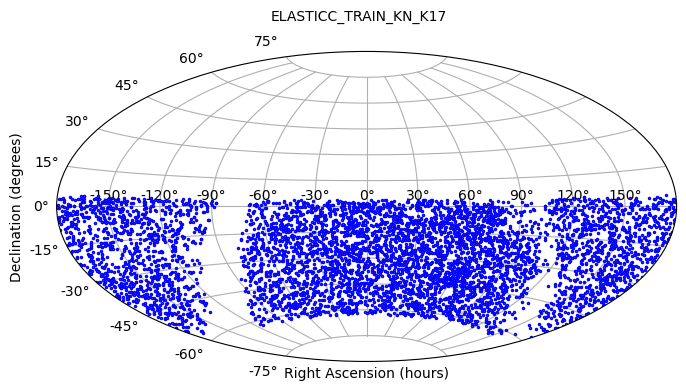

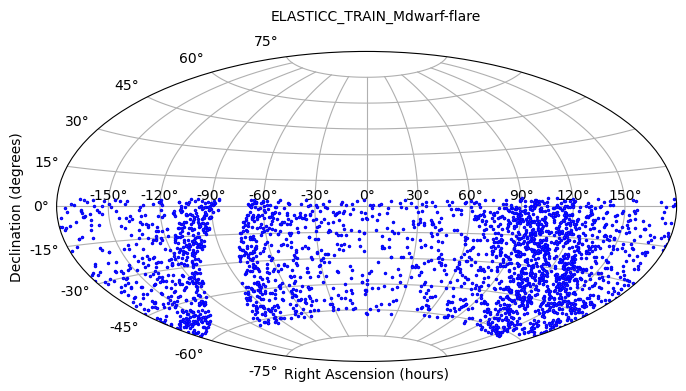

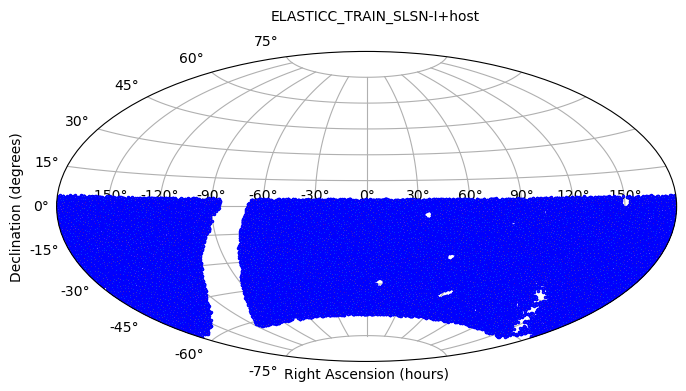

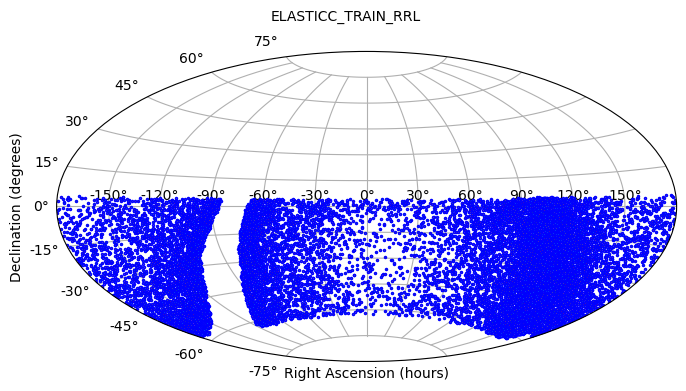

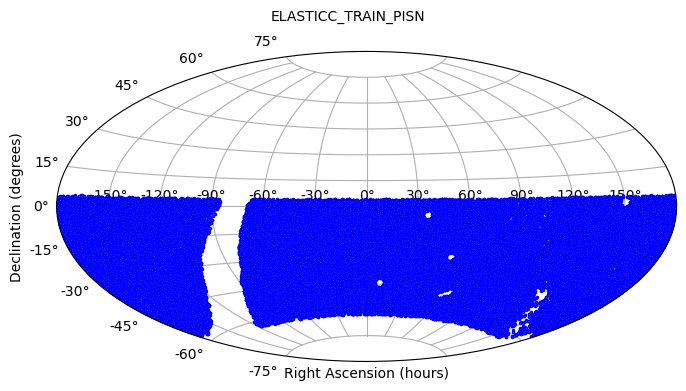

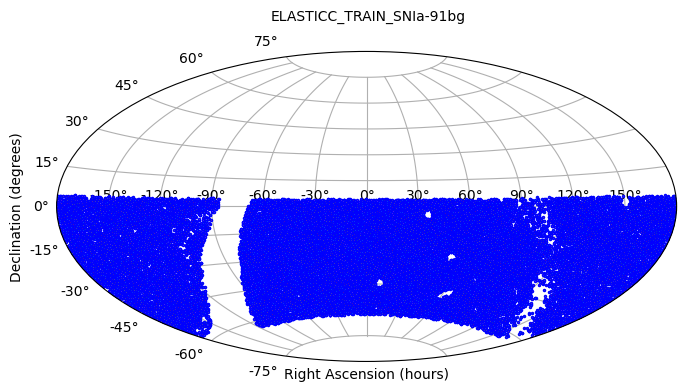

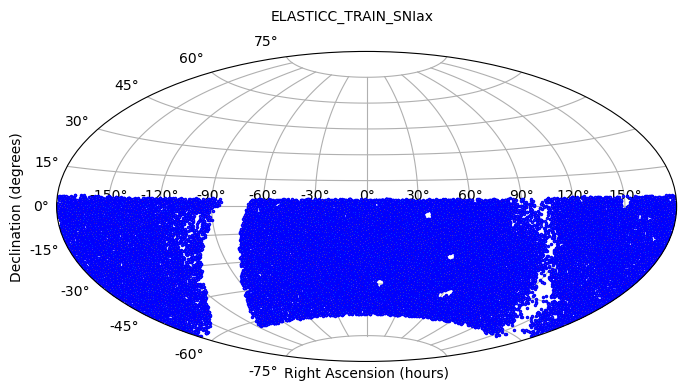

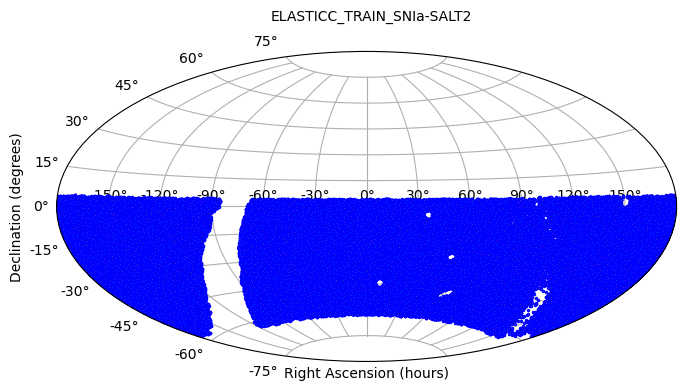

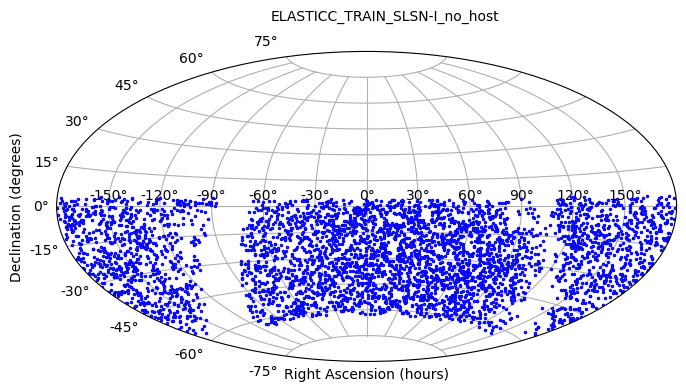

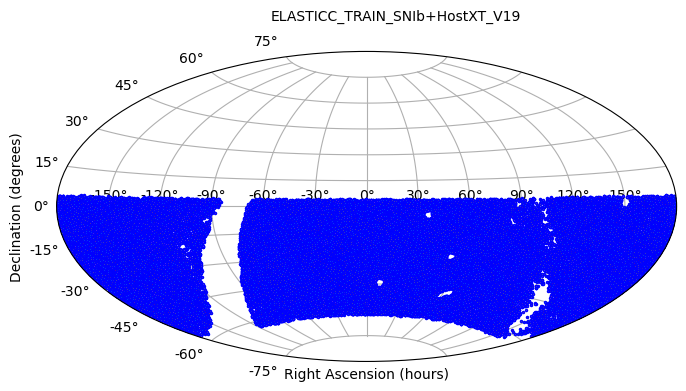

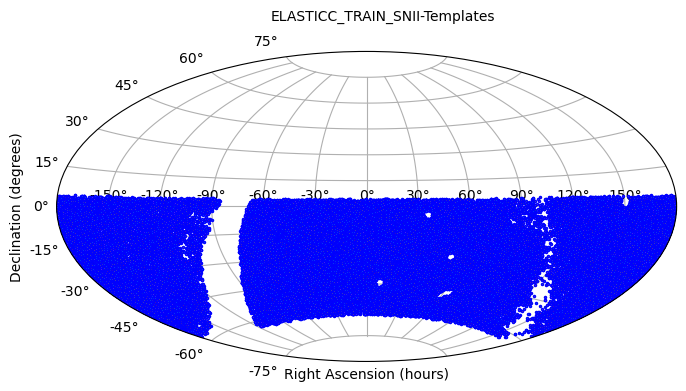

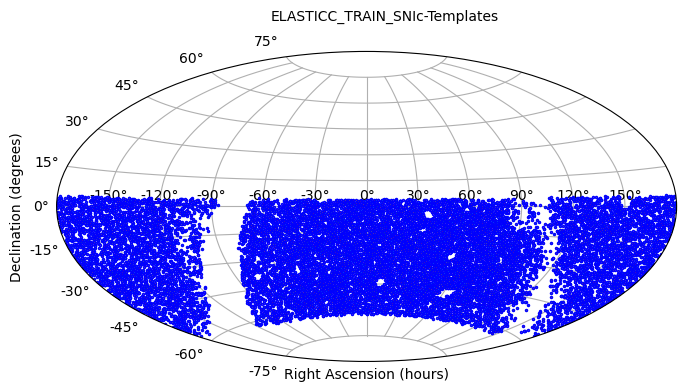

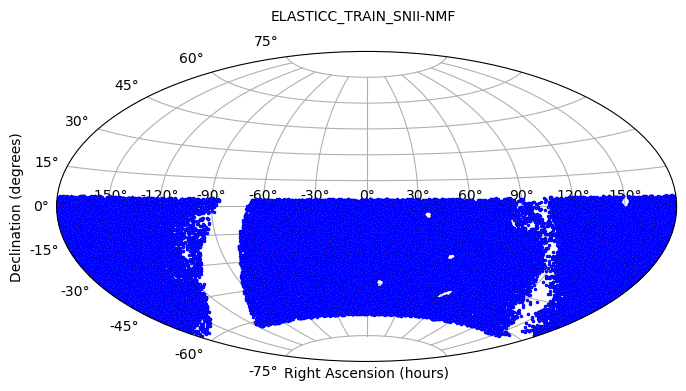

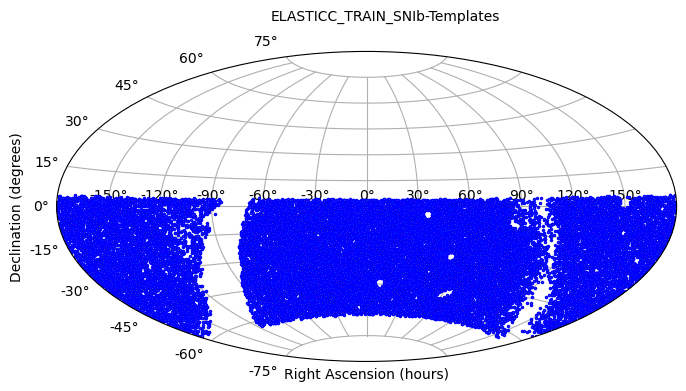

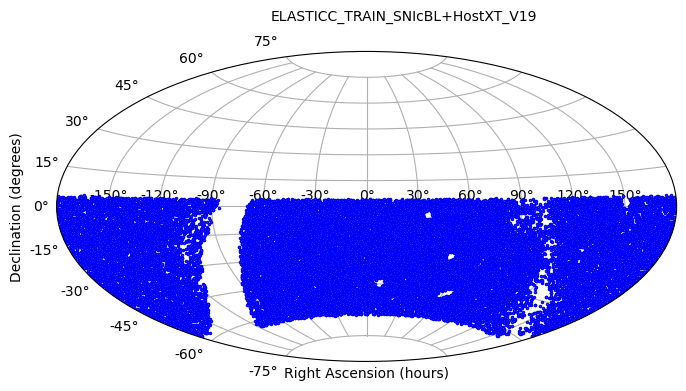

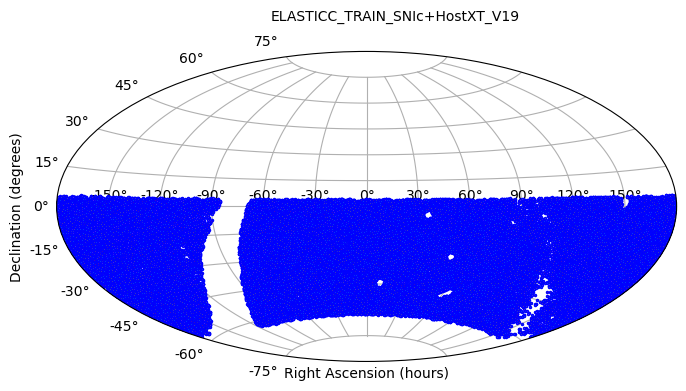

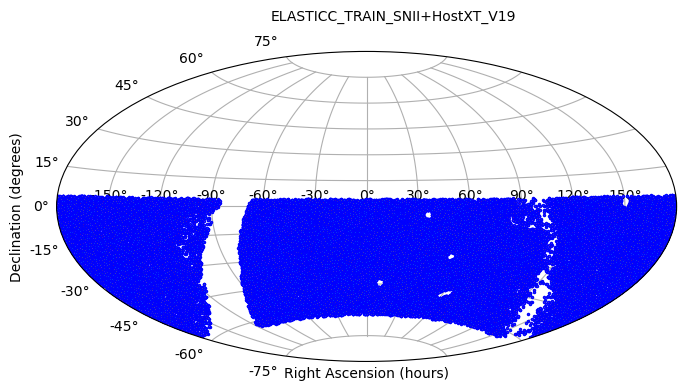

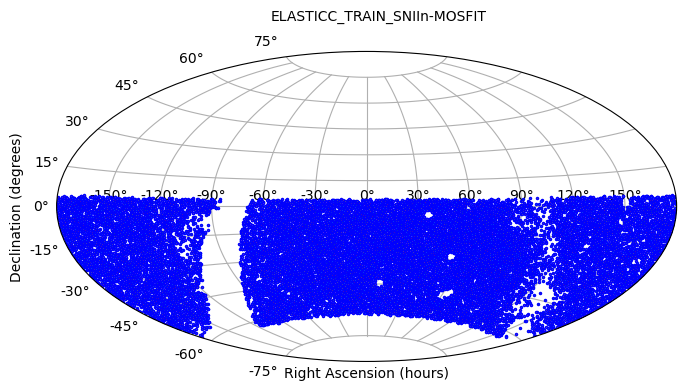

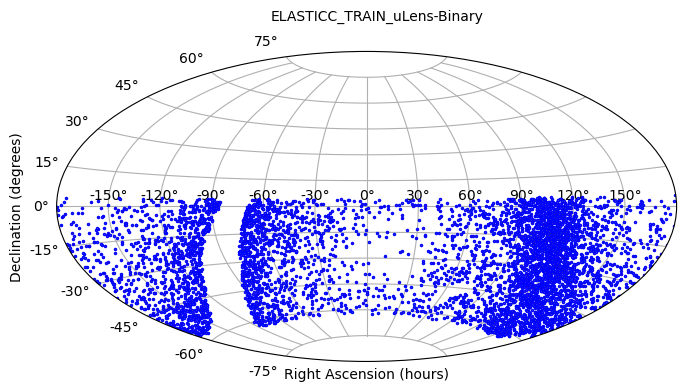

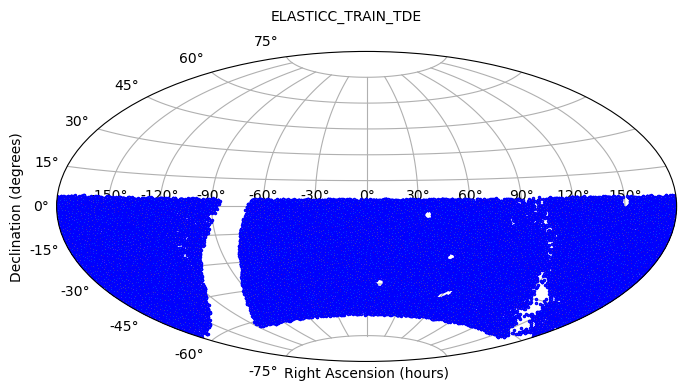

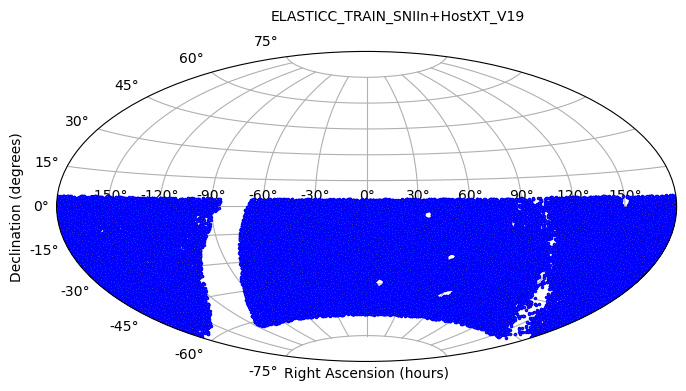

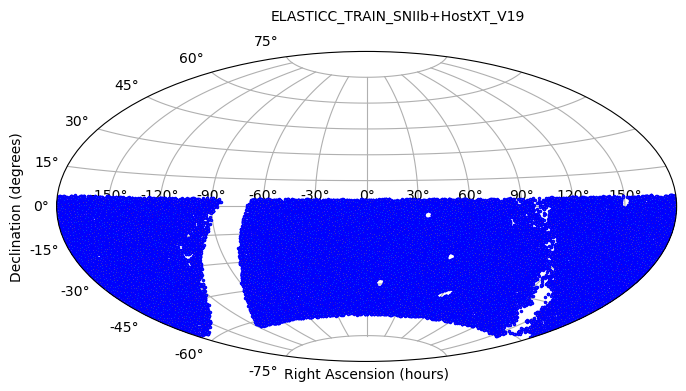

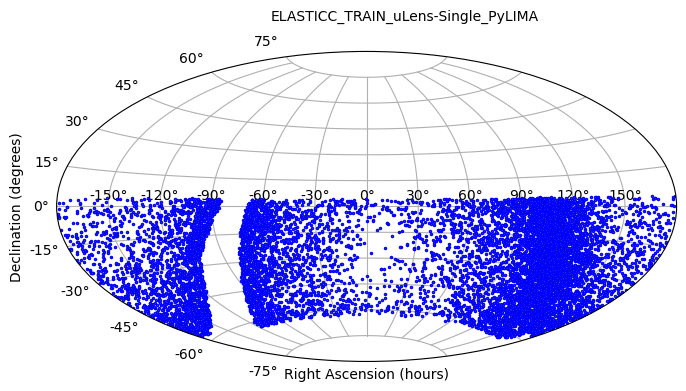

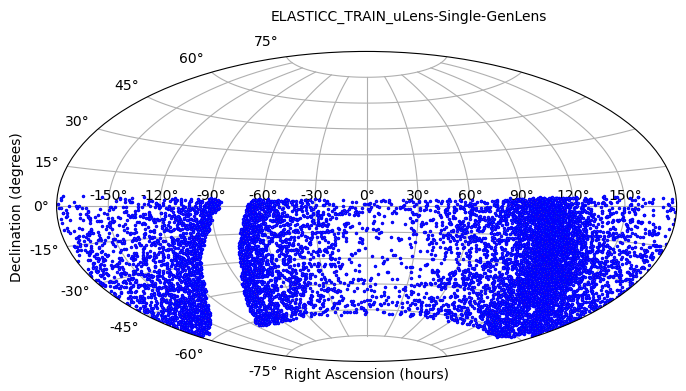

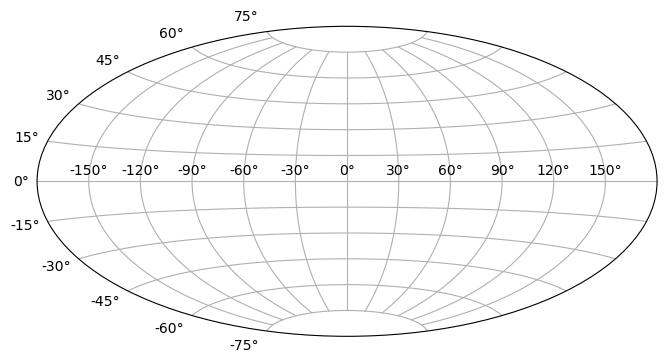

In [112]:
data_set = "Elasticc"
models = ['ELASTICC_TRAIN_'+mod for mod in ['d-Sct', 'CART', 'AGN', 'Cepheid', 'EB', 'dwarf-nova', 'ILOT', 'KN_B19', 'KN_K17', 'Mdwarf-flare', 'SLSN-I+host', 'RRL', 'PISN', 'SNIa-91bg', 'SNIax', 'SNIa-SALT2', 'SLSN-I_no_host', 'SNIb+HostXT_V19', 'SNII-Templates', 'SNIc-Templates', 'SNII-NMF', 'SNIb-Templates', 'SNIcBL+HostXT_V19', 'SNIc+HostXT_V19', 'SNII+HostXT_V19', 'SNIIn-MOSFIT', 'uLens-Binary', 'TDE', 'SNIIn+HostXT_V19', 'SNIIb+HostXT_V19', 'uLens-Single_PyLIMA', 'uLens-Single-GenLens']]
colors = dict(zip(models, ["b", "r", "g", "y"]))
def sky_elasticc(model):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='aitoff')  # Aitoff projection example
    ax.grid(True) 
    for fit in [file for file in sorted(os.listdir(Path(data_set, model))) if file[-12:] == "HEAD.FITS.gz"]:
        head = fits.open(Path(data_set, model, fit))[1].data
        ra = head["RA"]  # Right Ascension in degrees
        dec = head["DEC"]  # Declination in degrees
        sky_coords = SkyCoord(ra=ra * u.deg, dec=dec * u.deg, frame='icrs') # Convert RA and DEC to SkyCoord object
        ax.plot(sky_coords.ra.wrap_at(180 * u.deg).radian, sky_coords.dec.radian, 'o', markersize=1.5, mec = "b", label=model)
    ax.set_xlabel('Right Ascension (hours)')
    ax.set_ylabel('Declination (degrees)')
    plt.annotate(model, xy=(0.3, 1.1), xytext=(20, 0), xycoords='axes fraction', textcoords='offset points', fontsize=10)
    plt.savefig(f"Figures_sky/sky_{model}.png")

for model in tqdm(models):
    print(model)
    sky_elasticc(model)

## Light curves plotting:
Elasticc / *Models* (32 folders)/ *.fit* (40 files) → n curves 

In [25]:
data_set = "Elasticc"                         # data set folder
model = "ELASTICC_TRAIN_uLens-Single-GenLens" # model folder
fit_file = "01"                               # fit file
lc = 8                                        # light curve
Bands = ["u ", "g ", "r ", "z ", "i ", "Y "]

def lc_elasticc(model, fit_file, lc, Bands):
    fig = plt.figure(model+fit_file)
    data_set = "Elasticc"  
    ff =[file for file in os.listdir(Path(data_set, model)) if file[-7:]=="FITS.gz"][0]
    ff = ff.split("-")[0]
    head = fits.open(Path(data_set, model, ff+f"-00{fit_file}_HEAD.FITS.gz"))[1].data
    phot = fits.open(Path(data_set, model, ff+f"-00{fit_file}_PHOT.FITS.gz"))[1].data
    inicio = head["PTROBS_MIN"][lc]
    final = head["PTROBS_MAX"][lc]
    curva = phot[inicio:final]
    
    filtercolors = {'u ':'b', 'g ':'c', 'r ':'g', 'i ':'orange', 'z ':'r', 'Y ':'m'}
    for band in Bands:
        lc_band = curva[curva["BAND"] == band]
        mjd = (lc_band["MJD"]-51544.5)/365.25 # Años
    #     mag = magnitud(curva["FLUXCAL"])
    #     mag_err =  magnitud_err(curva["FLUXCAL"],curva["FLUXCALERR"])
        flux = lc_band["FLUXCAL"]
        flux_err = lc_band["FLUXCALERR"]
        plt.errorbar(mjd, flux, flux_err, color=filtercolors[band], marker='o', mew = 0.05,linestyle='--', lw = 1, label = band[0])
    plt.xlabel("Epoch (year)")
    plt.ylabel("Flux")
    plt.title(model+" "+fit_file+" "+str(lc))
    plt.legend()
    plt.savefig(f"Figures_lc/lc_{model}-{fit_file}-{lc}.png")
    plt.close()
    return curva, mjd, flux, flux_err

# curva, mjd, flux, flux_err = lc_elasticc(model, fit_file, lc, Bands)

models = ['ELASTICC_TRAIN_'+mod for mod in ['d-Sct', 'CART', 'AGN', 'Cepheid', 'EB', 'dwarf-nova', 'ILOT', 'KN_B19', 'KN_K17', 'Mdwarf-flare', 'SLSN-I+host', 'RRL', 'PISN', 'SNIa-91bg', 'SNIax', 'SNIa-SALT2', 'SLSN-I_no_host', 'SNIb+HostXT_V19', 'SNII-Templates', 'SNIc-Templates', 'SNII-NMF', 'SNIb-Templates', 'SNIcBL+HostXT_V19', 'SNIc+HostXT_V19', 'SNII+HostXT_V19', 'SNIIn-MOSFIT', 'uLens-Binary', 'TDE', 'SNIIn+HostXT_V19', 'SNIIb+HostXT_V19', 'uLens-Single_PyLIMA', 'uLens-Single-GenLens']]
colors = dict(zip(models, ["b", "r", "g", "y"]))

for model in models:
    curva, mjd, flux, flux_err = lc_elasticc(model, "05", 5, Bands)
    print(model)

ELASTICC_TRAIN_d-Sct
ELASTICC_TRAIN_CART
ELASTICC_TRAIN_AGN
ELASTICC_TRAIN_Cepheid
ELASTICC_TRAIN_EB
ELASTICC_TRAIN_dwarf-nova
ELASTICC_TRAIN_ILOT
ELASTICC_TRAIN_KN_B19
ELASTICC_TRAIN_KN_K17
ELASTICC_TRAIN_Mdwarf-flare
ELASTICC_TRAIN_SLSN-I+host
ELASTICC_TRAIN_RRL
ELASTICC_TRAIN_PISN
ELASTICC_TRAIN_SNIa-91bg
ELASTICC_TRAIN_SNIax
ELASTICC_TRAIN_SNIa-SALT2
ELASTICC_TRAIN_SLSN-I_no_host
ELASTICC_TRAIN_SNIb+HostXT_V19
ELASTICC_TRAIN_SNII-Templates
ELASTICC_TRAIN_SNIc-Templates
ELASTICC_TRAIN_SNII-NMF
ELASTICC_TRAIN_SNIb-Templates
ELASTICC_TRAIN_SNIcBL+HostXT_V19
ELASTICC_TRAIN_SNIc+HostXT_V19
ELASTICC_TRAIN_SNII+HostXT_V19
ELASTICC_TRAIN_SNIIn-MOSFIT
ELASTICC_TRAIN_uLens-Binary
ELASTICC_TRAIN_TDE
ELASTICC_TRAIN_SNIIn+HostXT_V19
ELASTICC_TRAIN_SNIIb+HostXT_V19
ELASTICC_TRAIN_uLens-Single_PyLIMA
ELASTICC_TRAIN_uLens-Single-GenLens


FileNotFoundError: [Errno 2] No such file or directory: 'Elasticc/ELASTICC_TRAIN_nts'

<Figure size 640x480 with 0 Axes>